In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
import re

In [7]:
df = pd.read_csv('./modified_laptops.csv')

In [8]:
df.head()

,Unnamed: 0,product_name,selling_price,actual_price,average_rating,rating_and_rivew,ram,SSD,processor,operating_system,exchange_offer,display_size
0,0,DELL XPS 13 Core i7 8th Gen - (16 GB/512 GB SS...,"₹1,22,490","₹1,39,104",1.7,3 Ratings & 0 Reviews,16 GB DDR3 RAM,512 GB SSD,Intel Core i7 Processor (8th Gen),64 bit Windows 10 Operating System,"Upto ₹18,100 Off on Exchange",33.78 cm (13.3 inch) Display
1,1,ASUS ZenBook S Core i7 8th Gen - (16 GB/512 GB...,"₹99,990","₹1,22,990",4.3,30 Ratings & 7 Reviews,16 GB DDR3 RAM,512 GB SSD,Intel Core i7 Processor (8th Gen),64 bit Windows 10 Operating System,"Upto ₹18,100 Off on Exchange",33.78 cm (13.3 inch) Display
2,2,Lenovo ThinkPad X1 Core i7 10th Gen - (16 GB/5...,"₹2,14,999","₹2,29,599",0.0,0,16 GB DDR3 RAM,512 GB SSD,Intel Core i7 Processor (10th Gen),64 bit Windows 10 Operating System,Bank Offer,35.56 cm (14 inch) Touchscreen Display
3,3,MSI GS Core i7 8th Gen - (16 GB/512 GB SSD/Win...,"₹1,49,990","₹1,69,990",4.1,10 Ratings & 3 Reviews,16 GB DDR4 RAM,512 GB SSD for Reduced Boot Up Time and in Gam...,Intel Core i7 Processor (8th Gen),Pre-installed Genuine Windows 10 Operating Sys...,"Upto ₹18,100 Off on Exchange",39.62 cm (15.6 inch) Display
4,4,MSI Stealth Core i7 8th Gen - (16 GB/512 GB SS...,"₹1,84,790","₹1,89,990",4.8,5 Ratings & 1 Reviews,16 GB DDR4 RAM,512 GB SSD,Intel Core i7 Processor (8th Gen),64 bit Windows 10 Operating System,"Upto ₹18,100 Off on Exchange",39.62 cm (15.6 inch) Display


In [9]:
df.shape

(946, 12)

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## checking duplicated rows

In [11]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [12]:
df.shape

(946, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      946 non-null    object 
 1   selling_price     946 non-null    object 
 2   actual_price      946 non-null    object 
 3   average_rating    946 non-null    float64
 4   rating_and_rivew  946 non-null    object 
 5   ram               946 non-null    object 
 6   SSD               946 non-null    object 
 7   processor         946 non-null    object 
 8   operating_system  946 non-null    object 
 9   exchange_offer    946 non-null    object 
 10  display_size      946 non-null    object 
dtypes: float64(1), object(10)
memory usage: 81.4+ KB


In [14]:
df.isna().sum()

product_name        0
selling_price       0
actual_price        0
average_rating      0
rating_and_rivew    0
ram                 0
SSD                 0
processor           0
operating_system    0
exchange_offer      0
display_size        0
dtype: int64

In [15]:
df['selling_price']= df['selling_price'].str.replace('₹','').str.replace(',','').astype('int32')

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

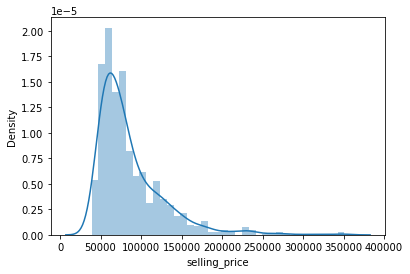

In [16]:
## Price analysis
## Right skewed
sns.distplot(df['selling_price'])

### working on product name column

We will take out the brand name first as the first word in each entry of product name is the brand name and can be extracted just by solitting the string on the basis of space

In [112]:
## reg expression extractor
def extractor(pattern,col,null=''):
    lst=[]
    for i in df[col]:
        box=re.findall(pattern,i)
        if len(box)!=0:
            lst.append(box[0])
        else:
            lst.append(null)
    return lst

In [18]:
## Taking the brand name out
df['product_name'] = df['product_name'].str.lower()
df= df.sort_values(by='product_name').reset_index(drop=True)
df['brand'] = df['product_name'].str.split(' ',n=1,expand=True).iloc[:,0]

In [19]:
product_lines=['IdeaPad', 'Legion', 'ThinkPad', 'ThinkBook', 'Yoga','Elitebook', 'Envy', 'Omen', 'Pavilion', 'ZBook', 'Spectre', 'Victus', 'ProBook', 'OmniBook','Alienware',' G Series', 'Inspiron', 'Latitude', 'Precision', 'Vostro'
               ,'XPS','MacBook', 'MacBook Air', 'MacBook Pro','Aspire', 'Enduro', 'Extensa', 'Ferrari', 'Nitro', 'Predator', 'Swift', 'Spin', 'Switch', 'TravelMate',
              'ProArt', 'Zenbook', 'Aspire', 'Vivobook', 'Chromebook', 'ROG', 'TUF', 'ZEPHYRUS', 'Experbook', 'Transformer', 'Pro','15s','14s',
              'X15', 'X16', 'M15', 'Area-51m R2', '13', '14', '15', '17', '18']

In [20]:
## creating a plotting function:
def eda(col):
    if df[col].value_counts().shape[0] <30:
        fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=2,figsize = (10,8))
        ## Value count Chart
        df[col].value_counts().plot(kind='bar',ax=ax1[0])
        ax1[0].set_title(f'value counts for {col}')
        
        ## Bar chart
        sns.barplot(x= df[col],y=df['selling_price'],ax=ax1[1])
        ax1[1].tick_params(axis='x', labelrotation = 90)
        ax1[1].set_title(f'bar chart {col} with selling_price')
        
        ## Box PLot
        sns.boxplot(df[col],df['selling_price'],ax=ax2[0])
        ax2[0].tick_params(axis='x', labelrotation = 90)
        ax2[0].set_title(f'box plot {col} with selling_price')
        
        ## plotting a reg plot if  column is numerical 
        if df[col].dtype != 'object':
            sns.regplot(df[col],df['selling_price'],ax2[1])
            ax2[1].tick_params(axis='x', labelrotation = 90)
            ax2[1].set_title(f'scatter plot chart {col} with selling_price')
        else:
            fig.delaxes(ax2[1])
        plt.tight_layout()
    else:
        ## plotting a single reg plot for  continuos numerical column
        sns.regplot(df[col],df['selling_price'])
        
        ## To plot the scatter plot for numerical columns on the fourth axis 
    if df[col].dtype != 'object':
        fig2, (ax3,ax4) = plt.subplots(ncols=2,nrows=1,figsize = (10,5))
        sns.distplot(df[col],ax=ax3)
        ax3.set_title(f'scatter plot chart {col} with selling_price')
        stats.probplot(df[col],plot=ax4)
        
        ## printing the correlation
        print('correlation with selling price: ',df.corr()['selling_price'][col])

In [21]:
df['brand'].value_counts()

asus         291
lenovo       167
hp           165
dell         141
acer          63
msi           50
apple         21
avita         20
lg             5
alienware      4
realme         4
vaio           4
mi             2
microsoft      2
nokia          2
samsung        2
smartron       2
infinix        1
Name: brand, dtype: int64

Further dividing the product name column

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


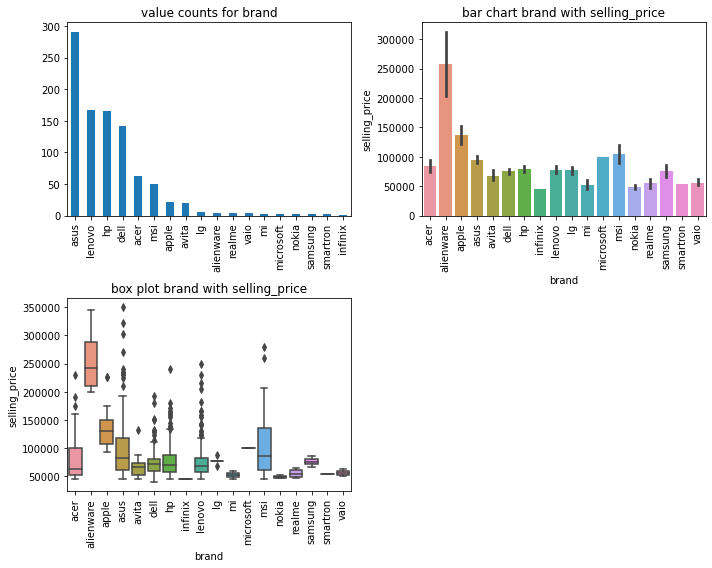

In [22]:
eda('brand')

## Ram and Ram_type

In [23]:
## ram_gb
test = df['ram'].str.split('\s',n=4,expand=True)
df['ram_gb'] = test.iloc[:,0]
df['ram_type'] =  test.iloc[:,2]
df.drop('ram',axis=1,inplace=True)
df['ram_gb']=df['ram_gb'].astype('int32')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  0.6407555051010153


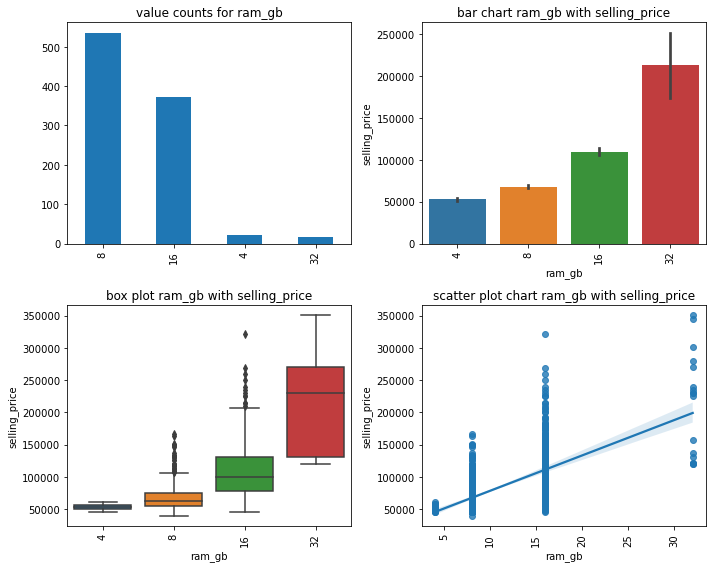

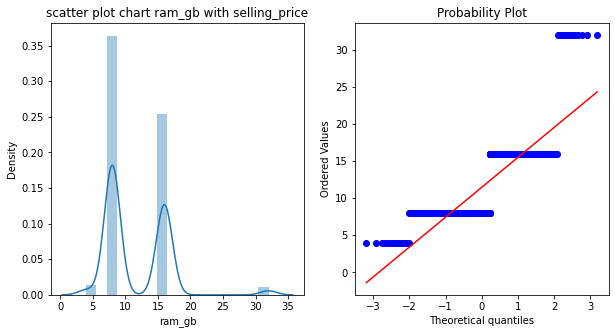

In [24]:
eda('ram_gb')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


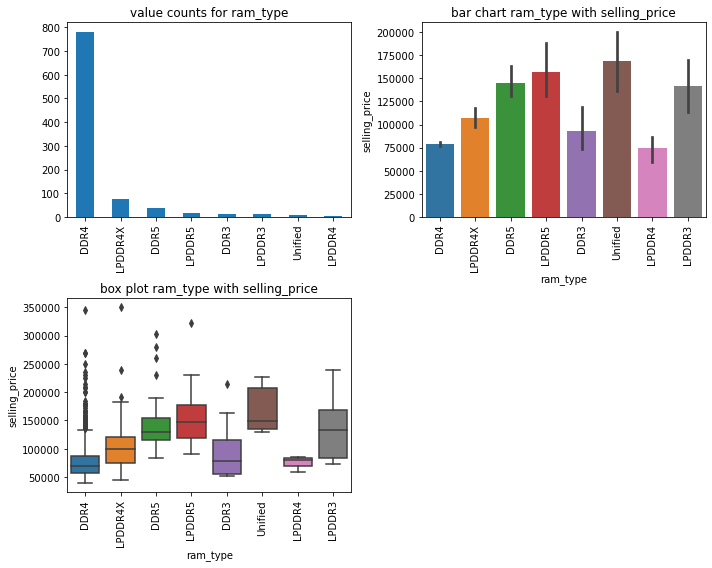

In [25]:
## Ram type:
eda('ram_type')

There is significant variations in prices for ram type, this is important column

In [26]:
df.head()

,product_name,selling_price,actual_price,average_rating,rating_and_rivew,SSD,processor,operating_system,exchange_offer,display_size,brand,ram_gb,ram_type
0,acer aspire 3 core i5 10th gen - (8 gb/1 tb hd...,49745,"₹56,491",3.3,33 Ratings & 6 Reviews,1 TB HDD,Intel Core i5 Processor (10th Gen),64 bit Windows 10 Operating System,"Upto ₹18,100 Off on Exchange",39.62 cm (15.6 inch) Display,acer,8,DDR4
1,acer aspire 3 core i5 11th gen - (8 gb/1 tb hd...,48999,"₹57,999",0.0,0,1 TB HDD,Intel Core i5 Processor (11th Gen),64 bit Windows 11 Operating System,Bank Offer,39.62 cm (15.6 Inch) Display,acer,8,DDR4
2,acer aspire 3 core i5 11th gen - (8 gb/1 tb hd...,49599,"₹57,999",0.0,0,1 TB HDD,Intel Core i5 Processor (11th Gen),64 bit Windows 11 Operating System,Bank Offer,39.62 cm (15.6 Inch) Display,acer,8,DDR4
3,acer aspire 3 core i5 11th gen - (8 gb/512 gb ...,49990,"₹59,990",0.0,0,512 GB SSD,Intel Core i5 Processor (11th Gen),64 bit Windows 11 Operating System,Bank Offer,39.62 cm (15.6 Inch) Display,acer,8,DDR4
4,acer aspire 3 ryzen 5 quad core 3500u - (8 gb/...,45541,"₹57,999",4.4,336 Ratings & 39 Reviews,512 GB SSD,AMD Ryzen 5 Quad Core Processor,64 bit Windows 10 Operating System,"Upto ₹18,100 Off on Exchange",39.62 cm (15.6 inch) Display,acer,8,DDR4


###  SSD<br>
Creating three columns (ssd_gb,hdd_gb,emmc_gb) from the SSD column

In [27]:
df['SSD']=df['SSD'].str.lower()
df['SSD']=df['SSD'].str.replace('for reduced boot up time and in game loading','')

In [28]:
index = df[df['SSD']=='m.2 slot for ssd upgrade'].index
df.loc[index,'SSD'] = '1 tb hdd' ## replacing 'm.2 slot for ssd upgrade' with '1 tb hdd' in SSD column

In [29]:
df['SSD'].value_counts()

512 gb ssd               530
1 tb ssd                 174
1 tb hdd|256 gb ssd       95
256 gb ssd                62
1 tb hdd                  57
128 gb ssd                 6
2 tb ssd                   4
512 gb hdd|512 gb ssd      4
1 tb hdd|512 gb ssd        3
1 tb hdd|128 gb ssd        3
128 gb ssd                 2
2 tb hdd                   2
128 gb emmc storage        1
1 tb hdd|1 tb ssd          1
64 gb emmc storage         1
512 gb ssd                 1
Name: SSD, dtype: int64

In [30]:
test1=df['SSD'].str.split('|',n=1, expand=True).iloc[:,0]
df['ssd_gb']=df['SSD'].str.split('|',n=1, expand=True).iloc[:,1].apply(lambda x: 0 if x is None else x.split(' ')[0]).astype('int32')

In [31]:
test1.value_counts()

512 gb ssd             530
1 tb ssd               174
1 tb hdd               159
256 gb ssd              62
128 gb ssd               6
2 tb ssd                 4
512 gb hdd               4
128 gb ssd               2
2 tb hdd                 2
128 gb emmc storage      1
64 gb emmc storage       1
512 gb ssd               1
Name: 0, dtype: int64

In [32]:
## creating hdd_gb column
df['hdd_gb'] =test1.apply(lambda x: x.split(' ')[0] if 'hdd' in x else 0).astype('int32')
df['hdd_gb']= df['hdd_gb'].apply(lambda x: 1024*x if (x==1 or x==2) else x )

In [33]:
## creating emmc_gb column
df['emmc_gb'] = test1.apply(lambda x: x.split(' ')[0] if 'emmc' in x else 0).astype('int32')

In [34]:
## creating ssd_gb column
df['ssd_gb'] = test1.apply(lambda x: x.split(' ')[0] if 'ssd' in x else 0).astype('int32') + df['ssd_gb']
df['ssd_gb']=df['ssd_gb'].apply(lambda x: 1024*x if (x==1 or x==2) else x )

In [35]:
df.drop('SSD',axis=1,inplace=True)

Doing EDA on these three columns

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  0.6053344383884517


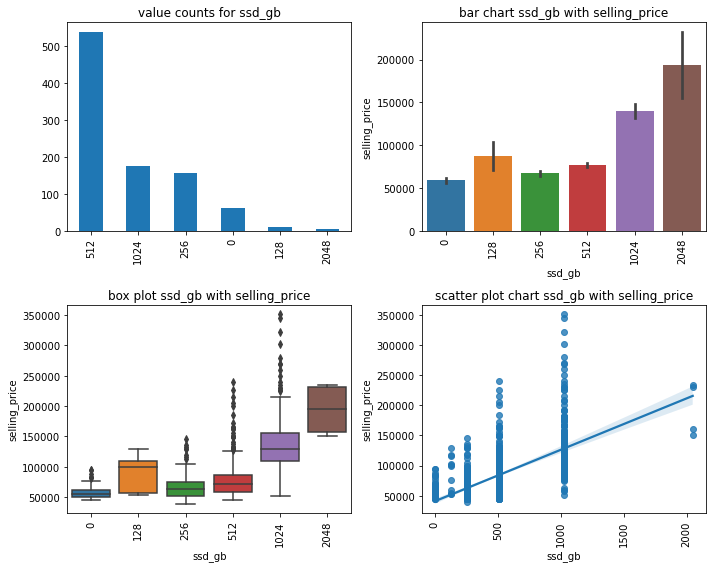

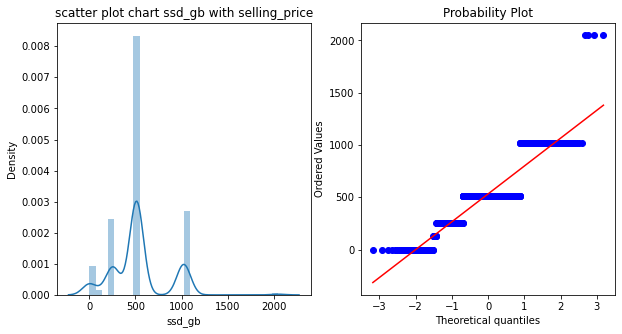

In [36]:
## ssd
eda('ssd_gb')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  -0.2230512525179289


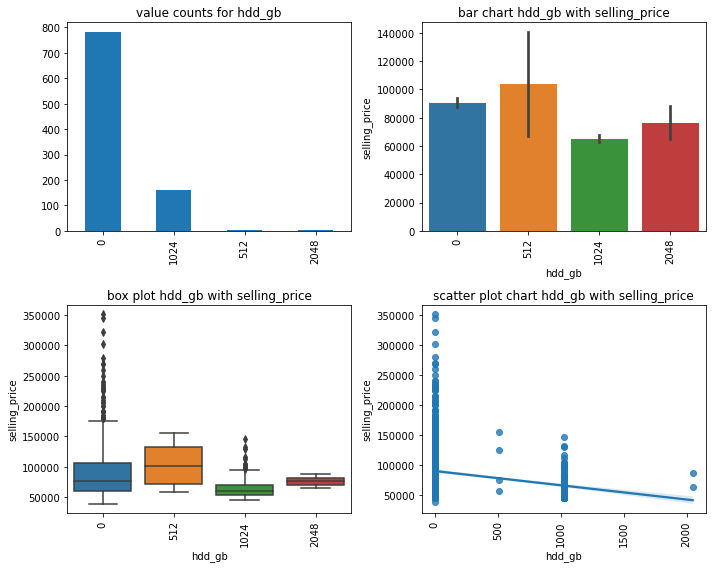

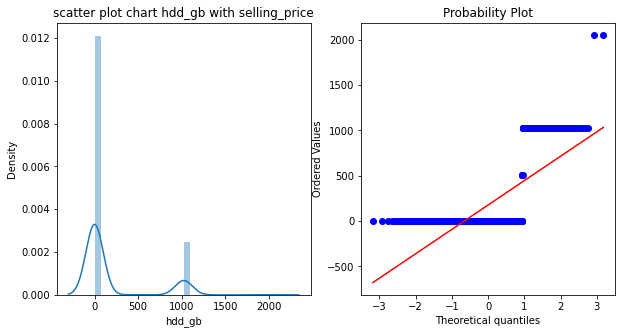

In [37]:
## hdd
eda('hdd_gb')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  -0.039313237725944375


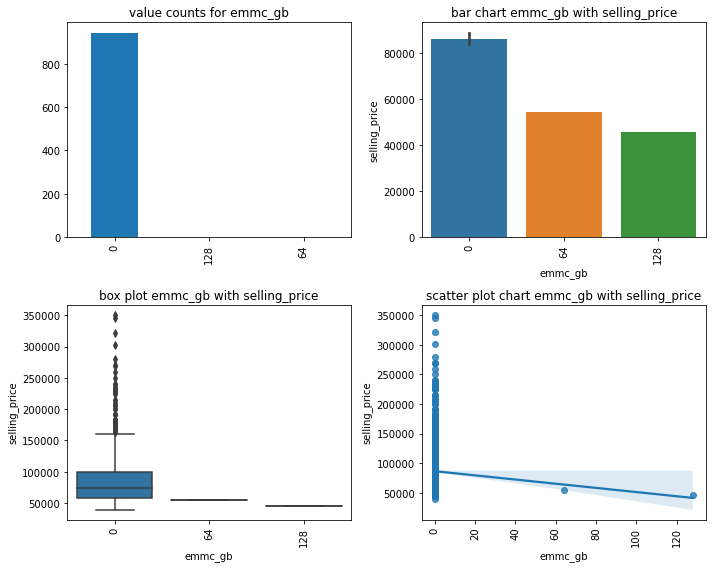

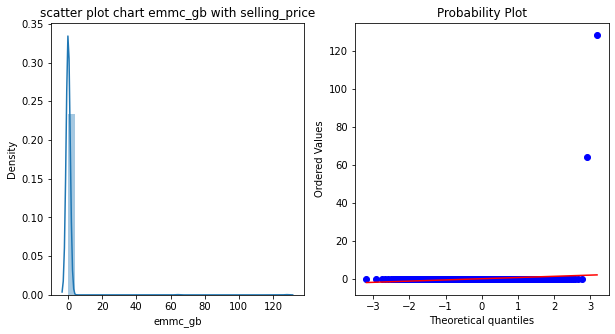

In [38]:
## emmc_gb
eda('emmc_gb')

### average rating

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  -0.2927055798384008


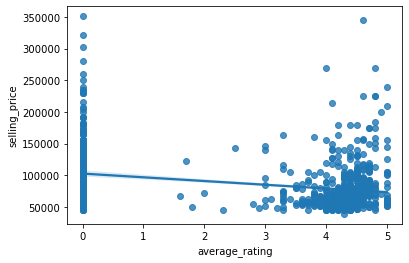

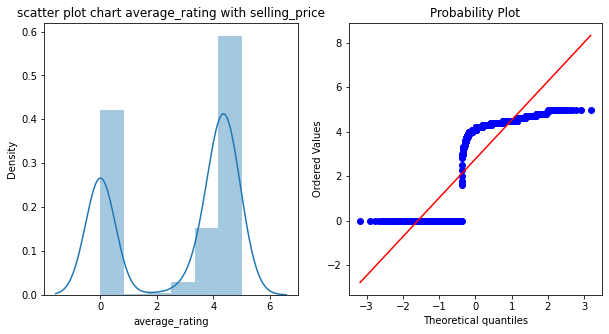

In [39]:
eda('average_rating')

In [40]:
## rating_and_rivew
df['rating_and_rivew'].value_counts()

0                           333
3 Ratings & 0 Reviews        18
4 Ratings & 0 Reviews        17
3 Ratings & 1 Reviews        11
4 Ratings & 1 Reviews         8
                           ... 
418 Ratings & 67 Reviews      1
10 Ratings & 2 Reviews        1
50 Ratings & 8 Reviews        1
13 Ratings & 0 Reviews        1
89 Ratings & 15 Reviews       1
Name: rating_and_rivew, Length: 439, dtype: int64

In [41]:
df['ratings'] = df['rating_and_rivew'].str.split('&',n=1,expand=True).iloc[:,0].str.split(' ',n=1,expand=True).iloc[:,0].str.replace(',','').astype('int32')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  -0.14486430129655187


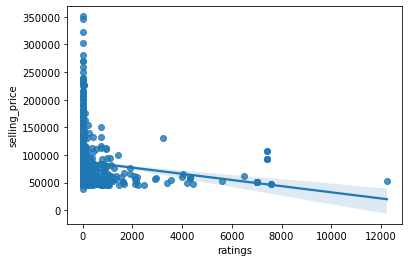

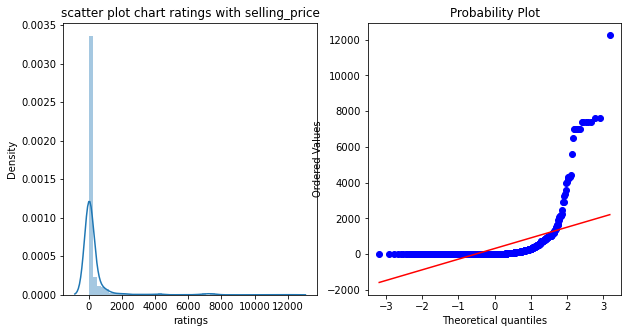

In [42]:
eda('ratings')

## processor<br>
Creating two columns (processor_name, processor_model)

In [43]:
df['processor']=df['processor'].str.lower()
df['processor'].value_counts().sort_index()

amd ryzen 3 hexa core processor (4th gen)                                                                      1
amd ryzen 5 dual core processor                                                                                1
amd ryzen 5 dual core processor (5th gen)                                                                      1
amd ryzen 5 hexa core processor                                                                               91
amd ryzen 5 hexa core processor (4th gen)                                                                      1
amd ryzen 5 hexa core processor (5th gen)                                                                      3
amd ryzen 5 octa core processor (11th gen)                                                                     1
amd ryzen 5 quad core processor                                                                               19
amd ryzen 5 quad core processor (3rd gen)                                                       

In [44]:
df['processor_name']=df['processor'].str.split(' ',n=1,expand=True).iloc[:,0].str.replace('powered','intel').str.replace('asus','amd')
test1 = df['processor'].str.split(' ',n=1,expand=True).iloc[:,0]

In [45]:
amd=extractor(r'ryzen\s\d','processor')
intel=extractor(r'i\d','processor')
apple =extractor(r'm\d','processor')
pentium =extractor(r'pentium quad','processor')

In [46]:
df['amd'] = amd
df['intel'] = intel
df['apple'] = apple
df['pentium'] = pentium

In [47]:
df['processor_model'] = df['amd']+df['intel']+df['apple']+df['pentium']
df.drop(['amd','intel','apple','pentium'],inplace=True,axis=1)

In [48]:
df.head()

,product_name,selling_price,actual_price,average_rating,rating_and_rivew,processor,operating_system,exchange_offer,display_size,brand,ram_gb,ram_type,ssd_gb,hdd_gb,emmc_gb,ratings,processor_name,processor_model
0,acer aspire 3 core i5 10th gen - (8 gb/1 tb hd...,49745,"₹56,491",3.3,33 Ratings & 6 Reviews,intel core i5 processor (10th gen),64 bit Windows 10 Operating System,"Upto ₹18,100 Off on Exchange",39.62 cm (15.6 inch) Display,acer,8,DDR4,0,1024,0,33,intel,i5
1,acer aspire 3 core i5 11th gen - (8 gb/1 tb hd...,48999,"₹57,999",0.0,0,intel core i5 processor (11th gen),64 bit Windows 11 Operating System,Bank Offer,39.62 cm (15.6 Inch) Display,acer,8,DDR4,0,1024,0,0,intel,i5
2,acer aspire 3 core i5 11th gen - (8 gb/1 tb hd...,49599,"₹57,999",0.0,0,intel core i5 processor (11th gen),64 bit Windows 11 Operating System,Bank Offer,39.62 cm (15.6 Inch) Display,acer,8,DDR4,0,1024,0,0,intel,i5
3,acer aspire 3 core i5 11th gen - (8 gb/512 gb ...,49990,"₹59,990",0.0,0,intel core i5 processor (11th gen),64 bit Windows 11 Operating System,Bank Offer,39.62 cm (15.6 Inch) Display,acer,8,DDR4,512,0,0,0,intel,i5
4,acer aspire 3 ryzen 5 quad core 3500u - (8 gb/...,45541,"₹57,999",4.4,336 Ratings & 39 Reviews,amd ryzen 5 quad core processor,64 bit Windows 10 Operating System,"Upto ₹18,100 Off on Exchange",39.62 cm (15.6 inch) Display,acer,8,DDR4,512,0,0,336,amd,ryzen 5


### EDA on 'processor_model' and 'processor_name'

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


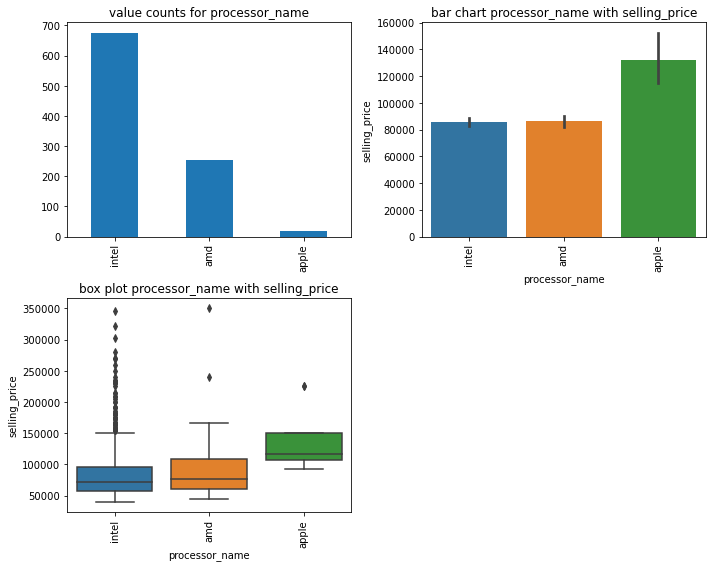

In [49]:
## processor_name
eda('processor_name')

In [50]:
df[df['processor_model']== 'ryzen 3']

,product_name,selling_price,actual_price,average_rating,rating_and_rivew,processor,operating_system,exchange_offer,display_size,brand,ram_gb,ram_type,ssd_gb,hdd_gb,emmc_gb,ratings,processor_name,processor_model
686,hp ryzen 3 hexa core 4th gen - (8 gb/512 gb ss...,58500,"₹78,000",0.0,0,amd ryzen 3 hexa core processor (4th gen),Windows 10 Operating System,Bank Offer,39.62 cm (15.6 inch) Display,hp,8,DDR4,512,0,0,0,amd,ryzen 3


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


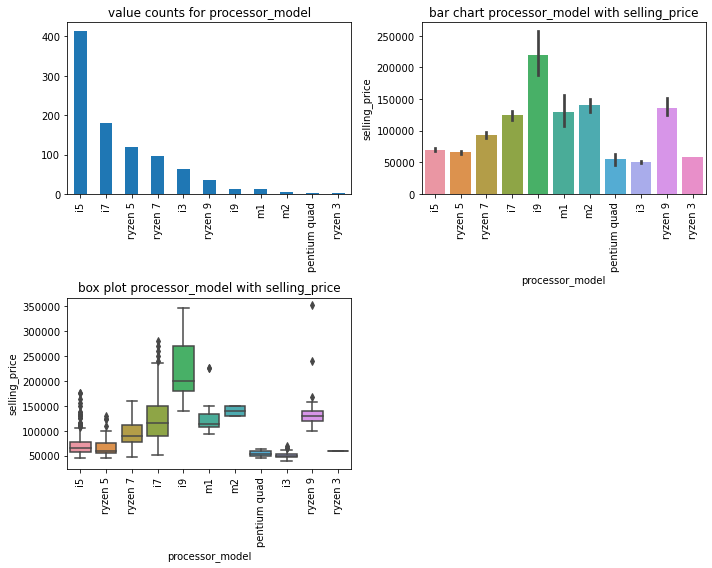

In [51]:
## processor_model
eda('processor_model')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      946 non-null    object 
 1   selling_price     946 non-null    int32  
 2   actual_price      946 non-null    object 
 3   average_rating    946 non-null    float64
 4   rating_and_rivew  946 non-null    object 
 5   processor         946 non-null    object 
 6   operating_system  946 non-null    object 
 7   exchange_offer    946 non-null    object 
 8   display_size      946 non-null    object 
 9   brand             946 non-null    object 
 10  ram_gb            946 non-null    int32  
 11  ram_type          946 non-null    object 
 12  ssd_gb            946 non-null    int64  
 13  hdd_gb            946 non-null    int64  
 14  emmc_gb           946 non-null    int32  
 15  ratings           946 non-null    int32  
 16  processor_name    946 non-null    object 
 1

## GPU <br> 
Note there is no actual gpu column in dataset, but the info for it is implicitly in the product name column: With a thorough analysis it was seen that when ever there were 'graphics' mentioned in product columns those laptops had nvidia graphics in them, while the rest have integrated graphics of the respective processors.

In [53]:
## Extracting GPUs from
df['processor'] = df['processor'].str.lower()
## extracting the string 'graph' from product names
df['nvd']=extractor('grap\w+','product_name') 
df['intel'] = extractor(r'intel','processor_name')
df['amd'] =extractor(r'amd','processor_name')
df['m1'] = extractor(r'apple','processor_name')
df['GPU'] = df['nvd'] + ' ' + df['intel'] + ' ' + df['amd']+ ' '+ df['m1'] 
lst = []
for i in df['GPU']:
    if 'graph' in  i:
        lst.append('nvidia')
    elif 'intel' in i:
        lst.append('intel')
    elif 'apple' in i:
        lst.append('apple')
    else:
        lst.append('amd')
df['gpu'] = lst

In [ ]:
## EDA gpu
eda('gpu')

### GPU gb

In [126]:
df['GPU_gb'] = extractor('\d\sgb\sgrap\w+','product_name',null=np.nan) 
df['GPU_gb'] = df['GPU_gb'].str.split(' ',n=1,expand=True).iloc[:,0].fillna(0)
df['GPU_gb'] = df['GPU_gb'].astype('int32')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  0.484828386180042


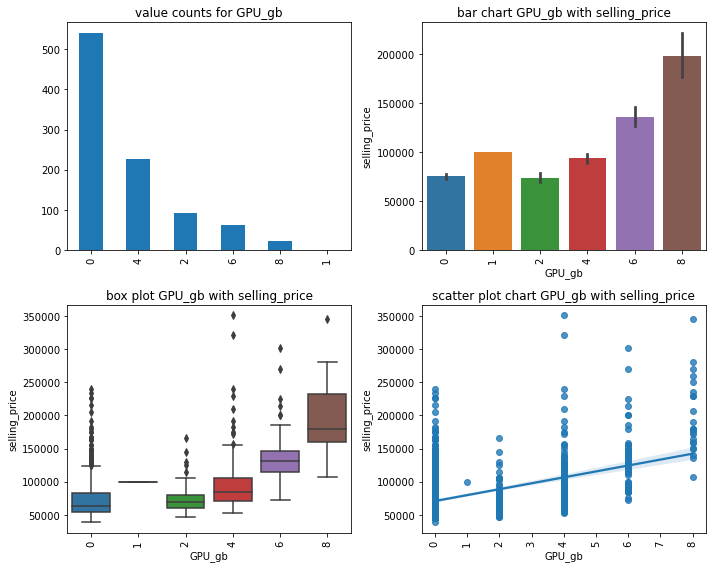

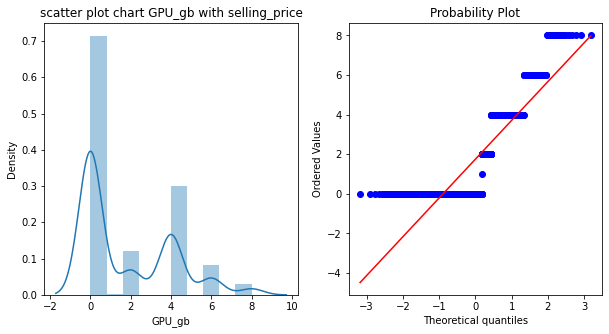

In [127]:
## EDA gpu gb
eda('GPU_gb')

## Operating system <br>
Creating a column named OS

In [55]:
df['operating_system'].value_counts()

64 bit Windows 10 Operating System                                                                                         519
64 bit Windows 11 Operating System                                                                                         266
Windows 10 Operating System                                                                                                 63
Windows 11 Operating System                                                                                                 56
Mac OS Operating System                                                                                                     21
Pre-installed Genuine Windows 10 Operating System (Includes Built-in Security, Free Automated Updates, Latest Features)     11
DOS Operating System                                                                                                         6
Linux/Ubuntu Operating System                                                                                  

In [56]:
df['windows'] = extractor('Win\w+.','operating_system')
df['mac']= extractor(r'Mac\sOS','operating_system')
df['dos']= extractor(r'DOS','operating_system')
df['linux/unix'] = extractor(r'\w+/\w+','operating_system')
df['chrome'] = extractor(r'Chrome','operating_system')
df['OS'] = df['windows']+df['mac']+df['dos']+df['linux/unix']+df['chrome']
df.drop(['windows', 'mac', 'dos', 'linux/unix', 'chrome','operating_system'],inplace=True,axis=1)
## As there are only 7 DOS, 1 Linux/unix, 1 Chrome OS we club them toghether in column 'others' 

test = df['OS'].value_counts()
other=test[test<8].index
df['OS']=df['OS'].replace(other,'others')

## EDA on OS

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


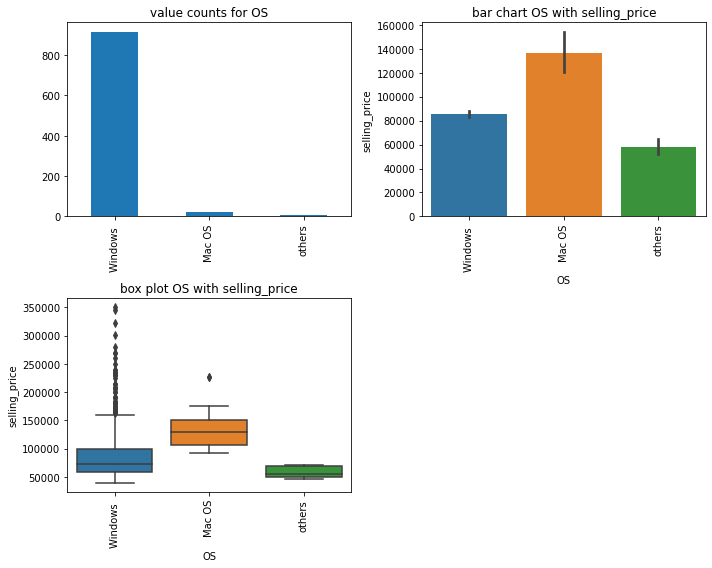

In [57]:
## OS
eda('OS')

## Display Size

In [58]:
df['display_size'] = df['display_size'].str.lower()

In [60]:
df['touchscreen'] = df['display_size'].apply(lambda x: 'yes' if 'touchscreen' in x else 'no')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


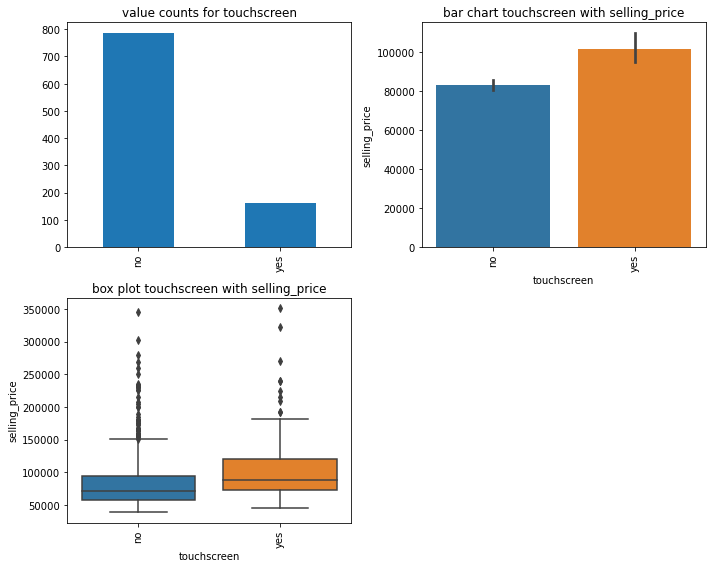

In [62]:
eda('touchscreen')

In [63]:
## extracting display size
df['display_size'] = extractor(r'\d*\.?\d+\sinch','display_size') # extracts display of type '\d\d.\d inch')
df['display_size']=df['display_size'].str.split(' ',n=1,expand=True).iloc[:,0]
## replacing '' with the most frequent value (mode)
df.loc[np.where(df['display_size']=='')[0][0],'display_size'] = df['display_size'].mode()[0]
df['display_size']=df['display_size'].astype('float32')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  -0.019944753134559387


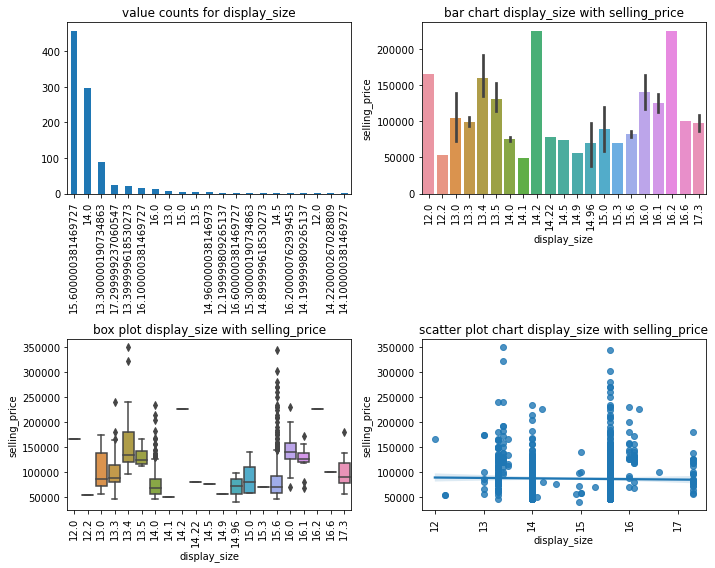

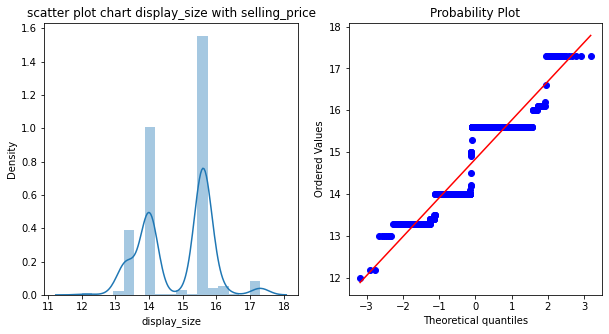

In [64]:
## EDA on display size
eda('display_size')

Not much variation of display size with price also the correaltion is very low

## Checking exchange offer

In [65]:
df['exchange_offer'].value_counts()  ## not of much use we will drop it

Bank Offer                        470
Upto ₹18,100 Off on Exchange      405
0                                  46
Upto ₹23,100 Off on Exchange       17
Lowest price since launch           2
Upto ₹21,100 Off on Exchange        1
No Cost EMI from ₹9,750/month       1
No Cost EMI from ₹7,041/month       1
No Cost EMI from ₹8,750/month       1
No Cost EMI from ₹10,666/month      1
Lowest Price in 15 days             1
Name: exchange_offer, dtype: int64

In [66]:
df.drop('exchange_offer',axis=1,inplace=True)

In [69]:
df.head(1)

,product_name,selling_price,actual_price,average_rating,rating_and_rivew,processor,display_size,brand,ram_gb,ram_type,...,processor_name,processor_model,nvd,intel,amd,m1,GPU,gpu,OS,touchscreen
0,acer aspire 3 core i5 10th gen - (8 gb/1 tb hd...,49745,"₹56,491",3.3,33 Ratings & 6 Reviews,intel core i5 processor (10th gen),15.6,acer,8,DDR4,...,intel,i5,graphics,intel,,,graphics intel,nvidia,Windows,no


sfdfsdfaf

In [252]:
final_columns = ['selling_price','display_size','brand','ram_gb','ram_type','ssd_gb','hdd_gb'
                 ,'processor_name',
       'processor_model', 'OS', 'touchscreen','gpu','GPU_gb']

In [253]:
df_new= df[final_columns]

In [254]:
df_new.sample(5)

,selling_price,display_size,brand,ram_gb,ram_type,ssd_gb,hdd_gb,processor_name,processor_model,OS,touchscreen,gpu,GPU_gb
114,49999,15.6,asus,8,DDR4,0,1024,intel,i5,Windows,no,nvidia,2
191,129990,15.6,asus,16,DDR4,1024,0,amd,ryzen 9,Windows,no,nvidia,6
396,51490,14.0,avita,8,DDR4,512,0,amd,ryzen 5,Windows,no,amd,0
902,83990,15.6,msi,16,DDR4,512,0,intel,i5,Windows,no,nvidia,6
162,321990,13.4,asus,16,LPDDR5,1024,0,intel,i9,Windows,yes,nvidia,4


<AxesSubplot:>

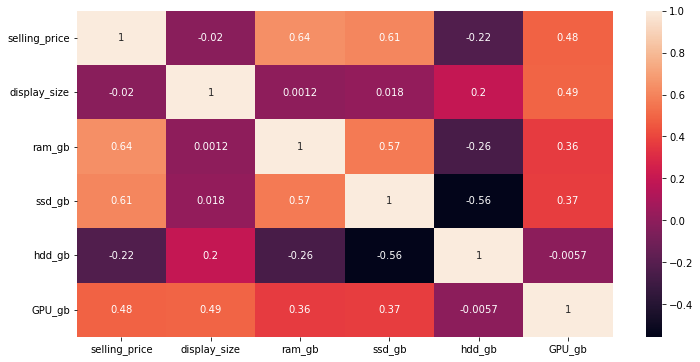

In [255]:
plt.figure(figsize=(12,6))
sns.heatmap(df_new.corr(),annot=True)

### Feature Engineering

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


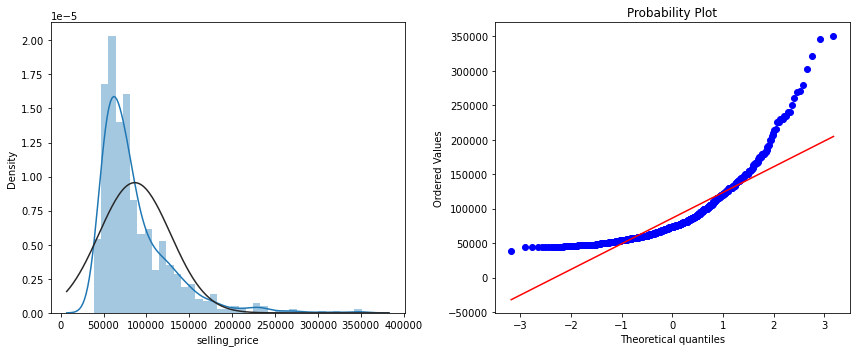

In [256]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.distplot(df_new['selling_price'],fit=norm,ax=ax1)
stats.probplot(df_new['selling_price'], plot=ax2)## Right Skwed
plt.tight_layout()
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


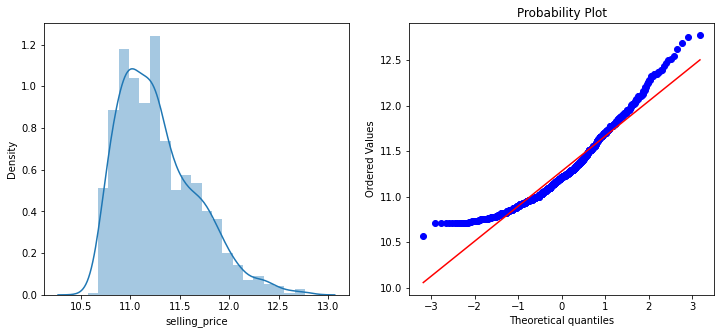

In [257]:
## applying log transformation on it
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.distplot(np.log(df_new['selling_price']),ax=ax1)
stats.probplot(np.log(df_new['selling_price']), plot=ax2)## Right Skwed
plt.show()

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [259]:
X = df_new.drop('selling_price',axis=1)
y = np.log(df_new['selling_price'])

In [260]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.18,random_state=32)

In [261]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()

In [262]:
X_train.head(3)

,display_size,brand,ram_gb,ram_type,ssd_gb,hdd_gb,processor_name,processor_model,OS,touchscreen,gpu,GPU_gb
635,15.6,hp,16,DDR4,1024,0,intel,i7,Windows,no,intel,0
595,16.1,hp,16,DDR4,1024,0,intel,i7,Windows,no,nvidia,8
671,14.0,hp,16,DDR4,512,0,intel,i7,Windows,yes,intel,0


In [263]:
## will give us the index representation of numerical and categorical columns which will be used in column tranformer
object_indices = []
decimal_idx = []
for i in range(X_train.shape[1]):
    if X_train.iloc[:,i].dtype== 'object':
        object_indices.append(i)
    else:
        decimal_idx.append(i)
print(object_indices)
print(decimal_idx)

[1, 3, 6, 7, 8, 9, 10]
[0, 2, 4, 5, 11]


In [264]:
## we will one-hot encode [2, 4, 9, 10, 11, 12] columnd and scaling the numerical columns
transformer = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False, drop='first'),object_indices),
    ('scale',StandardScaler(),decimal_idx) ## Scaling the numerical columns 
],remainder='passthrough')

In [265]:
X_train_tf = transformer.fit_transform(X_train.values)
X_test_tf = transformer.transform(X_test.values)

In [266]:
X_train_tf.shape

(775, 47)

###  Model Building

In [267]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [268]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [269]:
pipe1 = LinearRegression()
pipe = Pipeline([
    ('step1',pipe1)
]
)

pipe.fit(X_train_tf,y_train)
y_pred = pipe.predict(X_test_tf)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8012299019227359
0.12409606929505088
0.027420745700865


## Lasso

In [270]:

pipe1 =Lasso(alpha=0.0001)
pipe = Pipeline([
    ('step1',pipe1)
]
)

pipe.fit(X_train_tf,y_train)
y_pred = pipe.predict(X_test_tf)
y_pred_tr = pipe.predict(X_train_tf)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_pred_tr))
print(mean_absolute_error(y_train,y_pred_tr))
print(mean_squared_error(y_train,y_pred_tr))

0.8021190718788958
0.12297826639730788
0.02729808286833356
0.8208160386704684
0.12319159416434994
0.028390584632994542


## Ridge

In [271]:
pipe1 =Ridge(alpha=0.1)
pipe = Pipeline([
    ('step1',pipe1)
]
)

pipe.fit(X_train_tf,y_train)
y_pred = pipe.predict(X_test_tf)
y_pred_tr = pipe.predict(X_train_tf)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_pred_tr))
print(mean_absolute_error(y_train,y_pred_tr))
print(mean_squared_error(y_train,y_pred_tr))

0.8023239800996088
0.12336841567573566
0.02726981535593336
0.8213072040951179
0.12280641191806506
0.0283127625251795


## DecisionTreeRegressor

In [272]:
pipe1 =DecisionTreeRegressor(max_depth=9)
pipe = Pipeline([
    ('step1',pipe1)
]
)

pipe.fit(X_train_tf,y_train)
y_pred = pipe.predict(X_test_tf)
y_pred_tr = pipe.predict(X_train_tf)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_pred_tr))
print(mean_absolute_error(y_train,y_pred_tr))
print(mean_squared_error(y_train,y_pred_tr))

0.6990795013206965
0.1376910039242176
0.04151260451285398
0.8822353874325576
0.09350537188599975
0.018659070683893598


## RandomForestRegressor

In [273]:
pipe1 =RandomForestRegressor(n_estimators=1000,
                            random_state=3,
                           max_samples=0.5,
                           max_features=0.5,
                           max_depth=12,
                           oob_score=True)
pipe = Pipeline([
    ('step1',pipe1)
]
)

pipe.fit(X_train_tf,y_train)
y_pred = pipe.predict(X_test_tf)
y_pred_tr = pipe.predict(X_train_tf)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_pred_tr))
print(mean_absolute_error(y_train,y_pred_tr))
print(mean_squared_error(y_train,y_pred_tr))

0.8091161663503444
0.11833575810339626
0.026332819229574665
0.8949817076283308
0.09240400400861945
0.016639495496514875


In [274]:
##AdaBoostRegressor
ada =AdaBoostRegressor()
ada.fit(X_train_tf,y_train)

AdaBoostRegressor()

In [275]:
y_pred = ada.predict(X_test_tf)
print('r2_score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))
print('mse',mean_squared_error(y_test,y_pred))

r2_score 0.6239596975482742
mae 0.18396463755242617
mse 0.05187553664534098


In [276]:
## GradientBoostingRegressor
gbr =GradientBoostingRegressor()
gbr.fit(X_train_tf,y_train)

GradientBoostingRegressor()

In [277]:
y_pred = gbr.predict(X_test_tf)
print('r2_score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))
print('mse',mean_squared_error(y_test,y_pred))

r2_score 0.7834163957430529
mae 0.1276534881379492
mse 0.02987815568213897


In [286]:
## XGBRegressor
xgr =XGBRegressor(n_estimators=500,max_depth = 8,reg_alpha = 0.0005,learning_rate=0.3,reg_lambda=1)
xgr.fit(X_train_tf,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.0005, reg_lambda=1, ...)

In [287]:
y_pred = xgr.predict(X_test_tf)
y_pred_train = xgr.predict(X_train_tf)
print('r2_score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))
print('mse',mean_squared_error(y_test,y_pred))
print('r2_score_tr',r2_score(y_train,y_pred_train))
print('mae_tr',mean_absolute_error(y_train,y_pred_train))
print('mse_tr',mean_squared_error(y_train,y_pred_train))

r2_score 0.8488892507018819
mae 0.1041691403025757
mse 0.020846040069669874
r2_score_tr 0.9545746163194337
mae_tr 0.04303101836593799
mse_tr 0.007197369621143748


In [288]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(xgr,X_train_tf,y_train,cv=4,scoring='r2')))

0.776670322864927


In [245]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100,500,1000]
random_state = [4]
max_depth= [12,9,8]   
params = {'n_estimators':n_estimators,
          'random_state':random_state,
         'max_depth':max_depth}
grid = GridSearchCV(xgr, param_grid=params,scoring='r2',cv=3)

In [246]:
grid.fit(X_train_tf,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.3, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=8, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0.0005, reg_lambda=2, ...),
             param_grid={'max_depth': [12, 9, 8],
                         'n_estimators': [100, 500, 1000],
                         'random_state': [4]},
             scoring='r2')

In [247]:
grid.best_params_

{'max_depth': 8, 'n_estimators': 100, 'random_state': 4}

### Selecting XGBRegressor as our final algo

In [289]:
## pipe line for XGBREgressor
pipe1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False, drop='first'),object_indices),
    ('scale',StandardScaler(),decimal_idx)
],remainder='passthrough')

pipe2 =XGBRegressor(n_estimators=100,max_depth = 8,reg_alpha = 0.00001)
pipe = Pipeline([
    ('step1',pipe1),
    ('step2',pipe2)   
]
)

In [292]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_pred_tr = pipe.predict(X_train)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_pred_tr))
print(mean_absolute_error(y_train,y_pred_tr))
print(mean_squared_error(y_train,y_pred_tr))

0.8596259214316377
0.10040448277243319
0.01936489415988563
0.9529923470025184
0.047051780010832295
0.007448070356972774


In [296]:
test = pd.DataFrame({'display_size':13.3,'brand':'apple','ram_gb':8,'ram_type':'DDR4','ssd_gb':256,'hdd_gb':0,'processor_name':'apple','processor_model':'m1','OS':'Mac OS','touchscreen':'no', 'gpu':'apple','GPU_gb':0 },index=[0])

In [297]:
np.exp(pipe.predict(test))

array([99956.69], dtype=float32)

In [ ]:
df_new

Hence after addding the gpu colummn the r2 score for xgboost regressor increased from 0.8 to 0.84 and we will make it as our final model

### Exporting Model

In [298]:
import pickle

pickle.dump(df_new,open('df.pkl','wb'))
pickle.dump(pipe,open('ppipe.pkl','wb'))

In [112]:
X_train.head()

,display_size,brand,ram_gb,ram_type,ssd_gb,hdd_gb,processor_name,processor_model,OS,touchscreen,gpu
635,15.600000,hp,16,DDR4,1024,0,intel,i7,Windows,no,intel
595,16.100000,hp,16,DDR4,1024,0,intel,i7,Windows,no,nvidia
671,14.000000,hp,16,DDR4,512,0,intel,i7,Windows,yes,intel
97,15.600000,asus,8,DDR4,256,0,intel,i3,Windows,no,intel
250,17.299999,asus,8,DDR4,512,0,intel,i5,Windows,no,nvidia
